In [1]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')

C:\Users\Siva Kumar\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Split dataset into features and labels
X = np.array(mnist.data)
y = np.array(mnist.target)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

In [5]:
print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)


KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...


KNeighborsClassifier(n_jobs=10)

In [6]:
with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)


Calculating Accuracy of trained Classifier...


In [7]:
print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)


Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...


In [8]:
print('\nKNN Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)


KNN Trained Classifier Confidence:  0.9727142857142858

Predicted Values:  ['1' '1' '9' ... '1' '2' '0']

Accuracy of Classifier on Validation Image Data:  0.9727142857142858

Confusion Matrix: 
 [[696   0   0   0   0   0   1   0   0   0]
 [  0 779   0   1   0   0   0   0   0   0]
 [  4   8 651   3   2   0   2   7   3   0]
 [  0   2   4 724   0   4   0   3   3   1]
 [  0   4   0   0 673   0   1   3   0  10]
 [  4   2   0   6   0 574   7   1   1   4]
 [  4   1   0   0   0   4 692   0   0   0]
 [  0   5   2   0   3   0   0 706   1   5]
 [  1  10   2   4   2  15   2   4 632   9]
 [  2   0   2   4   6   3   0   8   1 682]]


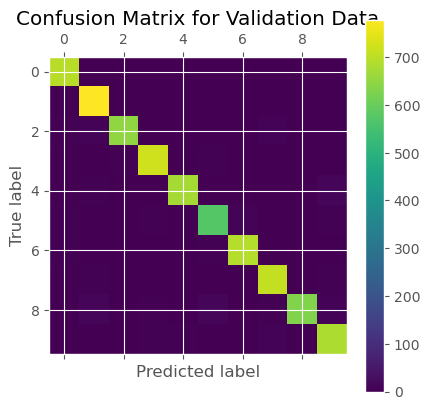

In [9]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()